# Homework #4 
410485002 資工四 胡孝德

In [1]:
import util.nbutil
from util.imutil import *

%matplotlib inline

importing Jupyter notebook from /home/nbuser/library/util/imutil.ipynb


## Chapter 9 Exercises

2\. Create a simple image with 

```
x, y = np.mgrid[0:256,0:256].astype(float)
z = np.sqrt((x-128)**2+(y-128)**2)
z2 = z.max()-z
```

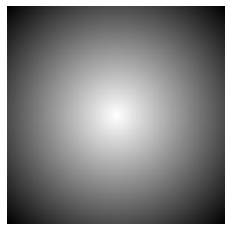

In [2]:
x, y = np.mgrid[0:256, 0:256].astype(float64)
z = np.sqrt((x - 128)**2 + (y - 128)**2)
z2 = z.max() - z
matplot([z2], cmap=["gray"])

Threhold z2 at different values, and comment on the results.  
What happens to the amount of White as the threshold value increases?  

白色的數量會隨著threhold的增加而減少。  

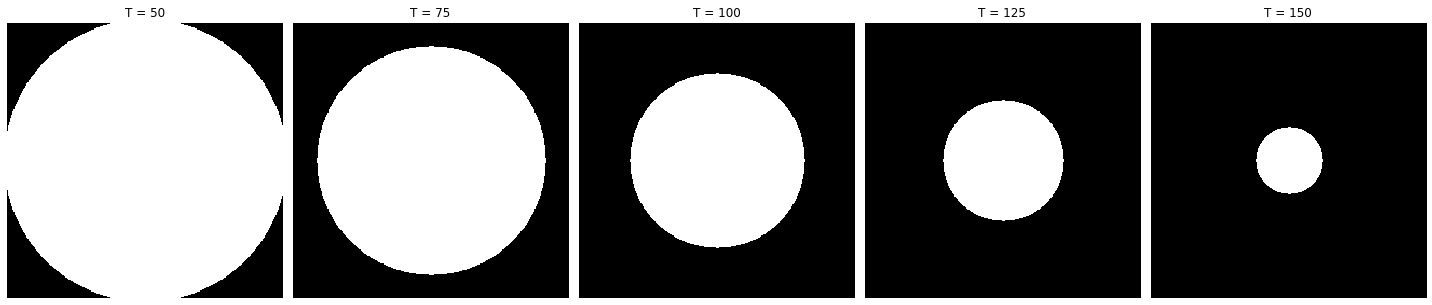

In [3]:
matplot([z2 > 50, z2 > 75, z2 > 100, z2 > 125, z2 > 150], 
        ["T = 50", "T = 75", "T = 100", "T = 125", "T = 150"])

Can you state and prove a general result?

本方法要邀篩選出來的部份是原影像顏色較暗的部份，threshold的值越大，表示原影像中越暗的會被篩出來。

3\. Repeat the above question, but with the image `cameraman.png`.

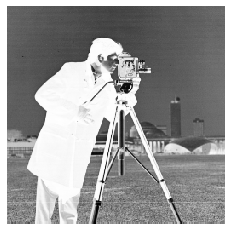

In [4]:
x, y = np.mgrid[0:256, 0:256].astype(float64)
z = imread("cameraman.png")
z2 = z.max() - z
matplot([z2], cmap=["gray"])

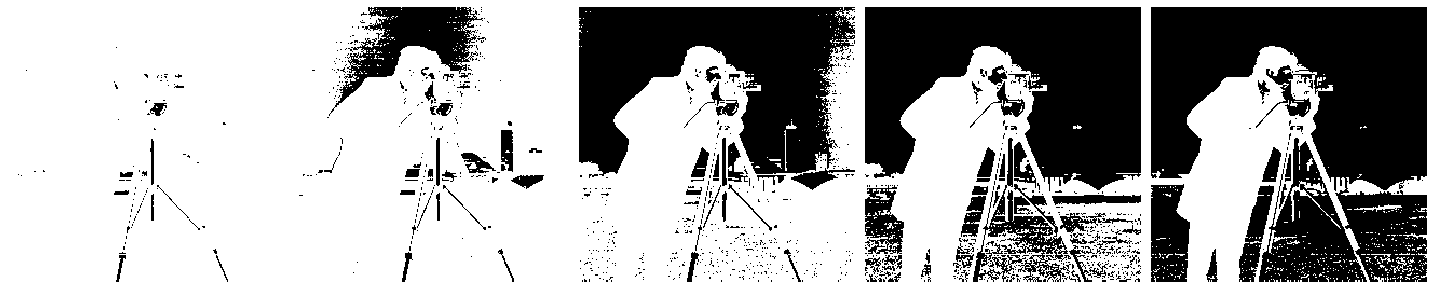

In [5]:
matplot([z2 > 50, z2 > 75, z2 > 100, z2 > 125, z2 > 150])

5\. Superimpose the image `nicework.png` onto the image `cameraman.png`. You can do this with

```
c = io.imread('cameraman.png')
n = io.imread('nicework.png')
m = c//2+n//2
```

Can you threshold this new image `m` to isolate the text?

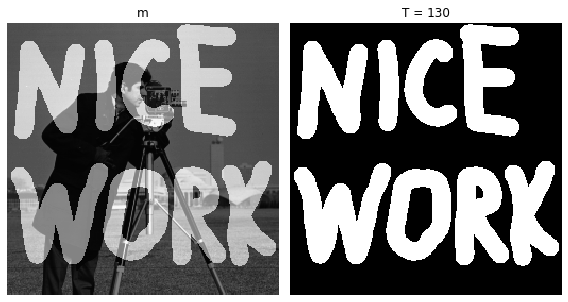

In [6]:
n = imread("nicework.png")
m = z // 2 + n // 2
matplot([m, m > 130], ["m", "T = 130"])

6\. Try the same problem as above, but define `m` as:

```
m = c.*(n==0);
```

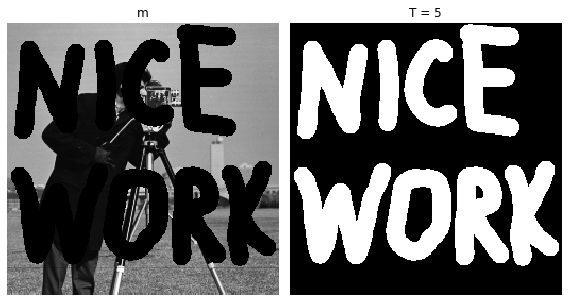

In [7]:
m = z * (n == 0)
matplot([m, m < 5], ["m", "T = 5"])

7\. Create a version of the circles image with

```
t = io.imread('circles.png')
x,y = np.mgrid[0:256,0:256].astype(float)
t2 = t.astype(float)*(x+y)/2
t3 = (t2/255).astype('uint8')
```

Attempt to threshold the image `t3` to obtain the circles alone, using adaptive thresholding.   
What sized blocks produce the best result?

將影像切成4塊的時候，會得到最好的結果。

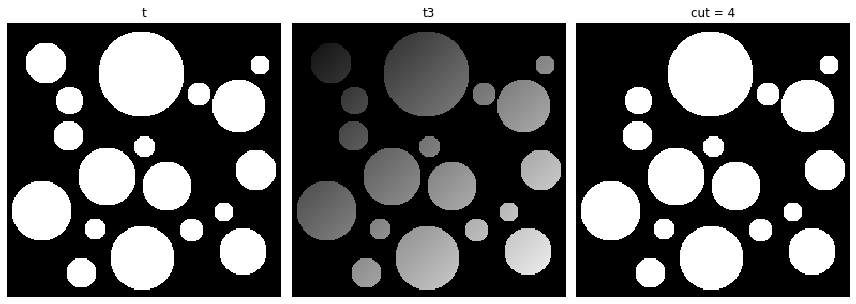

In [8]:
t = imread("circles.png")
x, y = np.mgrid[0:256, 0:256].astype(float64)
t2 = t.astype(float64) * (x + y) / 2
t3 = (t2 / 255).astype("uint8")
t4 = threshold_adaptive(t3, 4)
matplot([t, t3, t4], ["t", "t3", "cut = 4"])

8\. Enter the following matrix using 

```
im = 200*np.ones((10, 10))
im[2:5,2:8]=50;im[5:8,3:7]=50
im = (im + np.round(8*sc.randn(10,10))).astype('uint8')
```

This will create something like this:
```
201  195  203  203  199  200  204  190  198  203
201  204  209  197  210  202  205  195  202  199
205  198   46   60   53   37   50   51  194  205
208  203   54   50   51   50   55   48  193  194
200  193   50   56   42   53   55   49  196  211
200  198  203   49   51   60   51  205  207  198
205  196  202   53   52   34   46  202  199  193
199  202  194   47   51   55   48  191  190  197
194  206  198  212  195  196  204  204  199  200
201  189  203  200  191  196  207  203  193  204
```

In [9]:
im = 200 * ones((10, 10))
im[2:5, 2:8] = 50
im[5:8, 3:7] = 50
im = (im + np.round(8 * np.random.randn(10, 10))).astype(float64)
int64(im)

array([[203, 203, 180, 198, 185, 214, 194, 193, 182, 196],
       [193, 204, 213, 191, 218, 199, 193, 202, 204, 201],
       [189, 204,  48,  48,  68,  52,  46,  49, 197, 206],
       [195, 196,  46,  43,  32,  53,  39,  44, 209, 191],
       [205, 209,  53,  46,  73,  50,  54,  65, 192, 197],
       [209, 201, 200,  45,  64,  50,  63, 195, 198, 183],
       [192, 187, 221,  44,  56,  54,  55, 204, 203, 195],
       [206, 210, 186,  50,  57,  56,  45, 210, 208, 194],
       [215, 199, 197, 200, 200, 211, 218, 202, 228, 204],
       [189, 199, 206, 197, 204, 189, 209, 208, 196, 203]])

and use the appropriate filter to apply each of the Roberts, Prewitt, Sobel, Laplacian, and zero-crossing edge-finding methods to the image. In the case of applying two filters (such as with Roberts, Prewitt, or Sobel) apply each filter separately, and join the results.  
Apply thresholding if necessary to obtain a binary image showing only the edges.  
Which method seems to produce the best results?

(a) Roberts

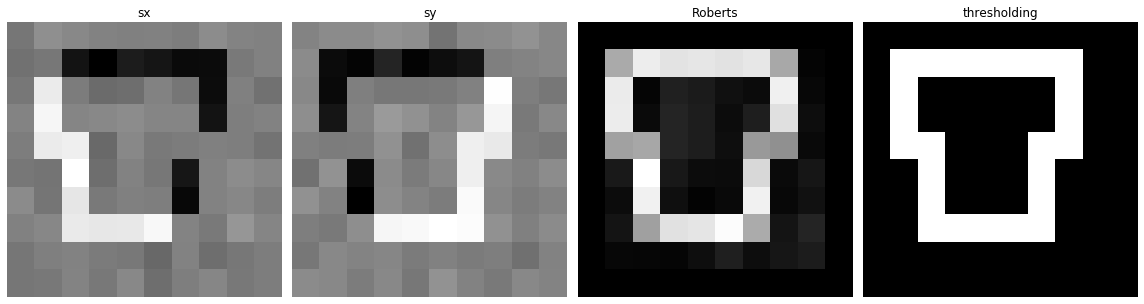

In [10]:
x = array([[0, 1, 0], [-1, 0, 0], [0, 0, 0]]) 
y = array([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
sx = convolve(im, x)
sy = convolve(im, y)
edge = roberts(im)
t = threshold_otsu(edge)
matplot([sx, sy, edge, edge > t], ["sx", "sy", "Roberts", "thresholding"], cmap=["gray", "gray", "gray", ""])

(b) Prewitt

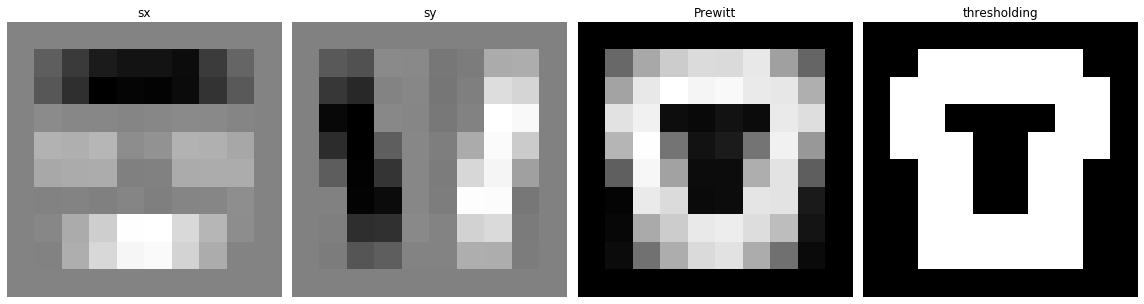

In [11]:
sx = prewitt_h(im)
sy = prewitt_v(im)
edge = prewitt(im)
t = threshold_otsu(edge)
matplot([sx, sy, edge, edge > t], ["sx", "sy", "Prewitt", "thresholding"], cmap=["gray", "gray", "gray", ""])

(c) Sobel

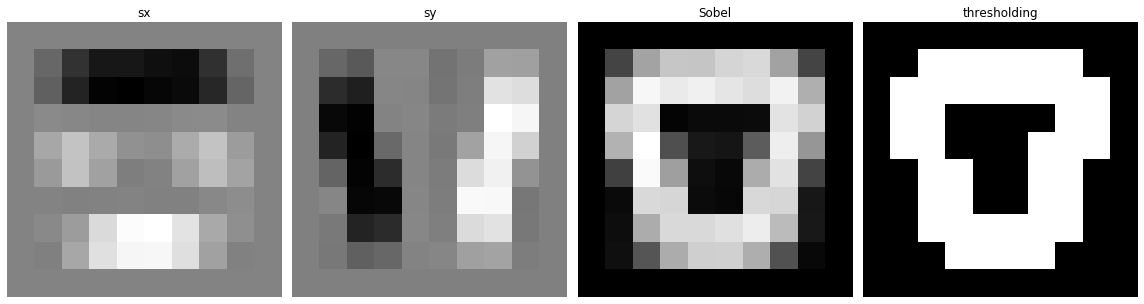

In [12]:
sx = sobel_h(im)
sy = sobel_v(im)
edge = sobel(im)
t = threshold_otsu(edge)
matplot([sx, sy, edge, edge > t], ["sx", "sy", "Sobel", "thresholding"], cmap=["gray", "gray", "gray", ""])

(d) Laplacian

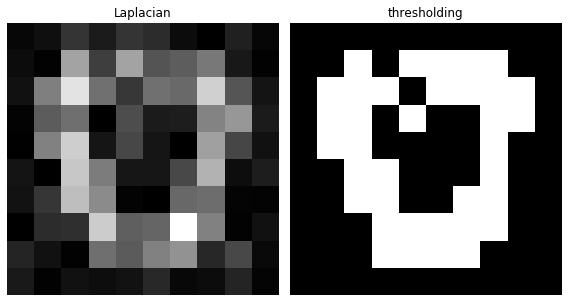

In [13]:
edge = abs(ndi.laplace(im))
t = threshold_otsu(edge)
matplot([edge, edge > t], ["Laplacian", "thresholding"], cmap=["gray", ""])

(e) zero-crossing

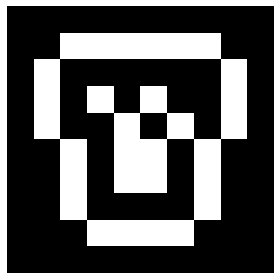

In [14]:
matplot([marr_hildreth(im, 0.5)])

10\. Open up the image `cameraman.png` in MATLAB, and apply each of the following edge-finding techniques in turn:

In [15]:
cm = img_as_float(z)

(a) Roberts

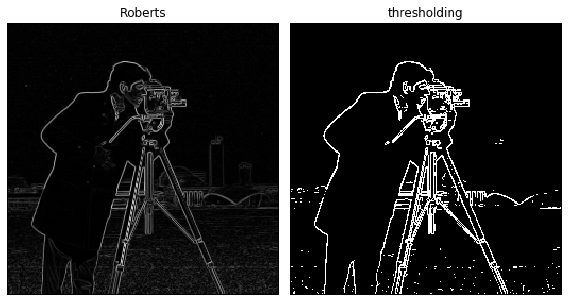

In [16]:
edge = roberts(cm)
t = threshold_otsu(edge)
matplot([edge, edge > t], ["Roberts", "thresholding"])

(b) Prewitt

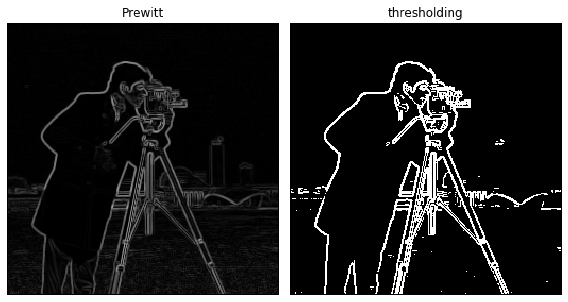

In [17]:
edge = prewitt(cm)
t = threshold_otsu(edge)
matplot([edge, edge > t], ["Prewitt", "thresholding"])

(c) Sobel

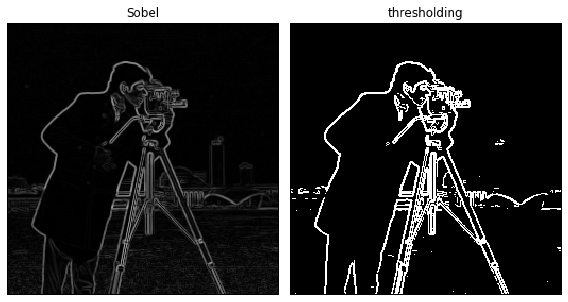

In [18]:
edge = sobel(cm)
t = threshold_otsu(edge)
matplot([edge, edge > t], ["Sobel", "thresholding"])

(d) Laplacian

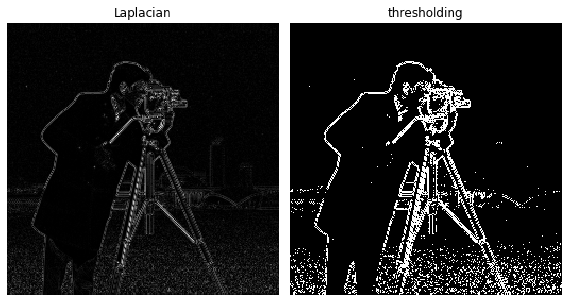

In [19]:
edge = abs(ndi.laplace(cm))
t = threshold_otsu(edge)
matplot([edge, edge > t], ["Laplacian", "thresholding"], cmap=["gray", ""])

(e) Zero-crossings of a Laplacian  
(f) The Marr-Hildreth method  
(g) Canny

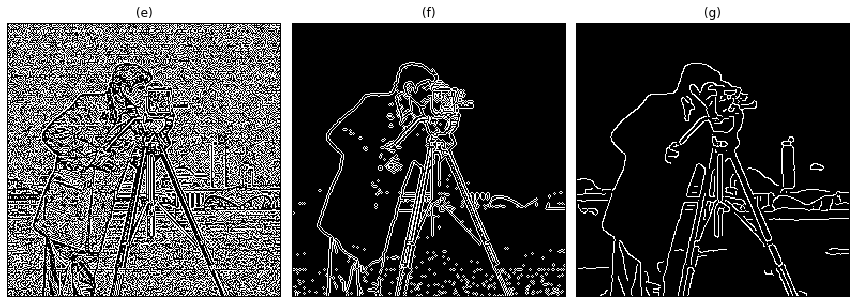

In [20]:
matplot([laplace_zerocross(cm), marr_hildreth(cm, 0.5), canny(cm, 1.7)], ["(e)", "(f)", "(g)"])

Which seems to you to provide the best looking result?

Canny

13\. Pick a grayscale image, and add some noise to it using the commands introduced in Section 8.2.  
Create two images: `c1` corrupted with salt and pepper noise, and `c2` correpted with Gaussian noise.  
Now apply the edge finding techniques to each of the "noisy" images `c1` and `c2`. Which technique seems to give

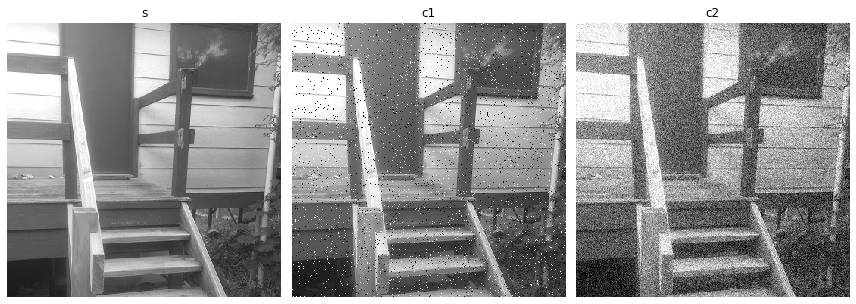

In [21]:
s = imread("stairs.png")
c1 = random_noise(s, "s&p")
c2 = random_noise(s, "gaussian")
matplot([s, c1, c2], ["s", "c1", "c2"])

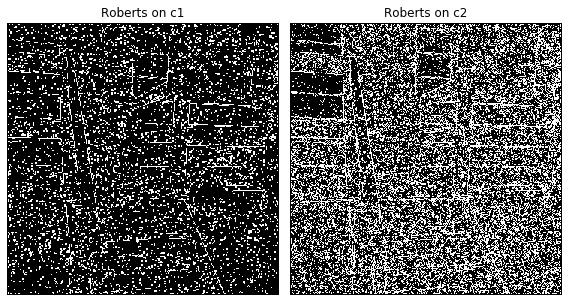

In [22]:
r1 = roberts(c1)
r2 = roberts(c2)
matplot([r1 > threshold_otsu(r1), r2 > threshold_otsu(r2)], ["Roberts on c1", "Roberts on c2"])

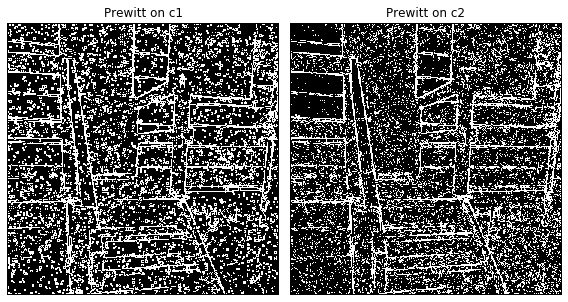

In [23]:
p1 = prewitt(c1)
p2 = prewitt(c2)
matplot([p1 > threshold_otsu(p1), p2 > threshold_otsu(p2)], ["Prewitt on c1", "Prewitt on c2"])

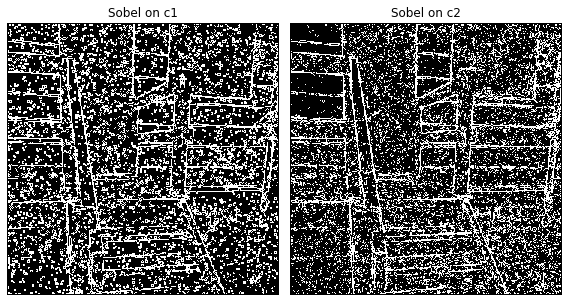

In [24]:
s1 = sobel(c1)
s2 = sobel(c2)
matplot([s1 > threshold_otsu(s1), s2 > threshold_otsu(s2)], ["Sobel on c1", "Sobel on c2"])

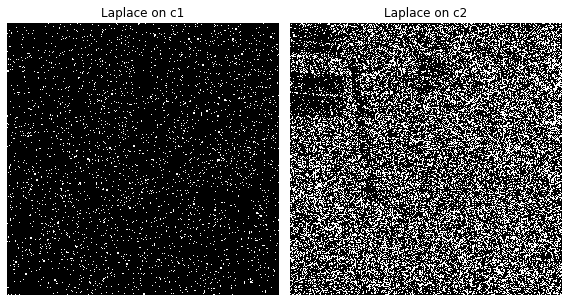

In [25]:
l1 = abs(ndi.laplace(c1))
l2 = abs(ndi.laplace(c2))
matplot([l1 > threshold_otsu(l1), l2 > threshold_otsu(l2)], ["Laplace on c1", "Laplace on c2"])

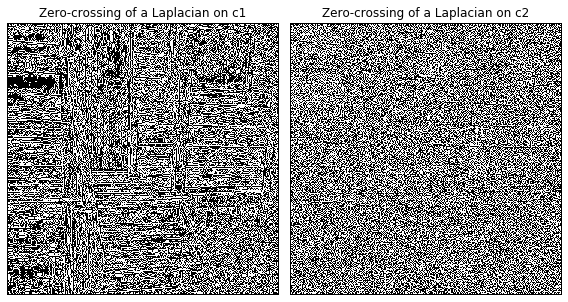

In [26]:
matplot([laplace_zerocross(c1), laplace_zerocross(c2)], 
        ["Zero-crossing of a Laplacian on c1", "Zero-crossing of a Laplacian on c2"])

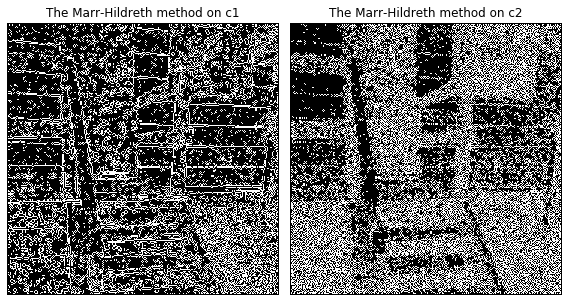

In [27]:
matplot([marr_hildreth(c1, 0.56), marr_hildreth(c2, 0.5)], 
        ["The Marr-Hildreth method on c1", "The Marr-Hildreth method on c2"])

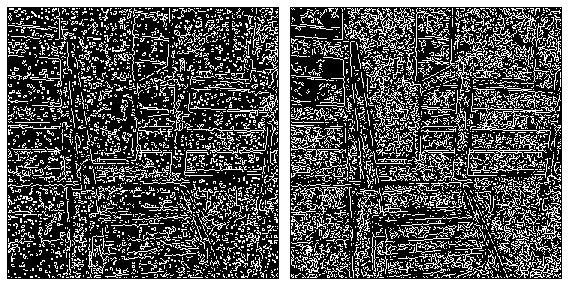

In [28]:
matplot([canny(c1), canny(c2)])

(a) The best results in the presense of noise?

Sobel

(b) The worst results in the presense of noise?

Laplance

## Chapter 10 Exercises

1\. For each of the following images Ai and structuring elements Bj:

```
A1 =             A2 =             A3 =             B1 =   B2 =   B3 =
0 0 0 0 0 0 0 0  0 0 0 0 0 0 0 0  0 0 0 0 0 0 0 0  0 1 0  1 1 1  1 0 0                           
0 0 0 1 1 1 1 0  0 1 1 1 1 1 1 0  0 0 0 0 0 1 1 0  1 1 1  1 1 1  0 0 0
0 0 0 1 1 1 1 0  0 1 1 1 1 1 1 0  0 1 1 1 0 1 1 0  0 1 0  1 1 1  0 0 1
0 1 1 1 1 1 1 0  0 1 1 0 0 1 1 0  0 1 1 1 0 1 1 0
0 1 1 1 1 1 1 0  0 1 1 0 0 1 1 0  0 1 1 1 0 1 1 0
0 1 1 1 1 0 0 0  0 1 1 1 1 1 1 0  0 1 1 1 0 0 0 0
0 1 1 1 1 0 0 0  0 1 1 1 1 1 1 0  0 1 1 1 0 0 0 0
0 0 0 0 0 0 0 0  0 0 0 0 0 0 0 0  0 0 0 0 0 0 0 0
```

calculate the erosion, the dilation, the opening, and the closing.  

In [29]:
A1 = array([[0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 1, 1, 1, 1, 0], 
            [0, 0, 0, 1, 1, 1, 1, 0], 
            [0, 1, 1, 1, 1, 1, 1, 0], 
            [0, 1, 1, 1, 1, 1, 1, 0], 
            [0, 1, 1, 1, 1, 0, 0, 0], 
            [0, 1, 1, 1, 1, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0]])
A2 = array([[0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 1, 1, 1, 1, 1, 1, 0], 
            [0, 1, 1, 1, 1, 1, 1, 0], 
            [0, 1, 1, 0, 0, 1, 1, 0], 
            [0, 1, 1, 0, 0, 1, 1, 0], 
            [0, 1, 1, 1, 1, 1, 1, 0], 
            [0, 1, 1, 1, 1, 1, 1, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0]])
A3 = array([[0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 1, 1, 0], 
            [0, 1, 1, 1, 0, 1, 1, 0], 
            [0, 1, 1, 1, 0, 1, 1, 0], 
            [0, 1, 1, 1, 0, 1, 1, 0], 
            [0, 1, 1, 1, 0, 0, 0, 0], 
            [0, 1, 1, 1, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0]])

In [30]:
B1 = array([[0, 1, 0], 
            [1, 1, 1], 
            [0, 1, 0]])
B2 = array([[1, 1, 1], 
            [1, 1, 1], 
            [1, 1, 1]])
B3 = array([[1, 0, 0], 
            [0, 0, 0], 
            [0, 0, 1]])

(a) erosion

In [31]:
for i in [A1, A2, A3]:
    for j in [B1, B2, B3]:
        binary_erosion(i, j) * 1

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

(b) dilation

In [32]:
for i in [A1, A2, A3]:
    for j in [B1, B2, B3]:
        binary_dilation(i, j) * 1

array([[0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0]])

array([[0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0]])

array([[0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0]])

array([[0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 0]])

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

array([[1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1]])

array([[0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0]])

array([[0, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0]])

(c) opening

In [33]:
for i in [A1, A2, A3]:
    for j in [B1, B2, B3]:
        binary_opening(i, j) * 1

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

(d) closing

In [34]:
for i in [A1, A2, A3]:
    for j in [B1, B2, B3]:
        binary_closing(i, j) * 1

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

4\. Using the binary images `circles.png`, `circle2.png`, `morph_text.png`, and `nicework.png`, view the erosion and dilation with both the square and the cross-shaped structuring elements.

In [35]:
c = imread("circles.png")
c2 = imread("circles2.png")
t = imread("morph_text.png")
n = imread("nicework.png")

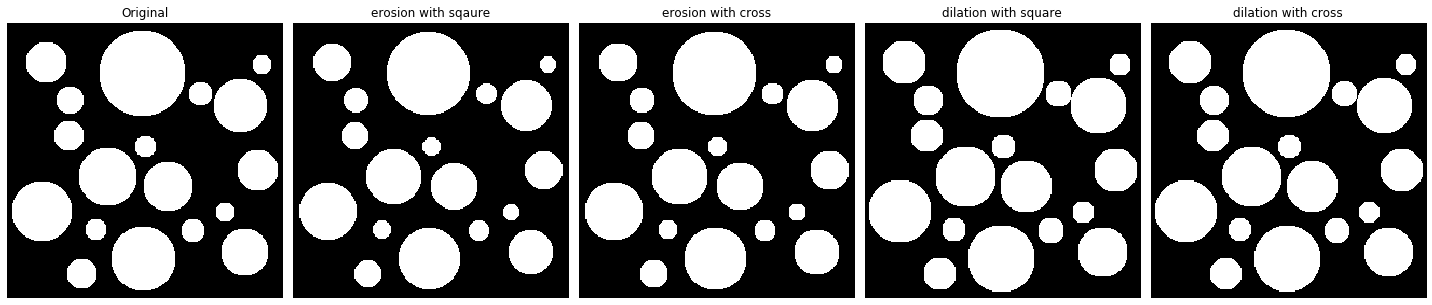

In [36]:
matplot([c, binary_erosion(c, sq), binary_erosion(c, cr), binary_dilation(c, sq), binary_dilation(c, cr)], 
        ["Original", "erosion with sqaure", "erosion with cross", "dilation with square", "dilation with cross"])

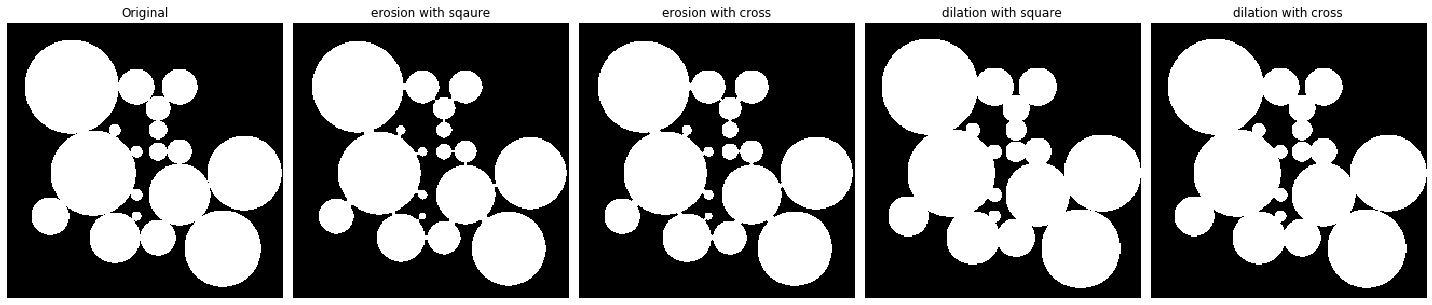

In [37]:
matplot([c2, binary_erosion(c2, sq), binary_erosion(c2, cr), binary_dilation(c2, sq), binary_dilation(c2, cr)], 
        ["Original", "erosion with sqaure", "erosion with cross", "dilation with square", "dilation with cross"])

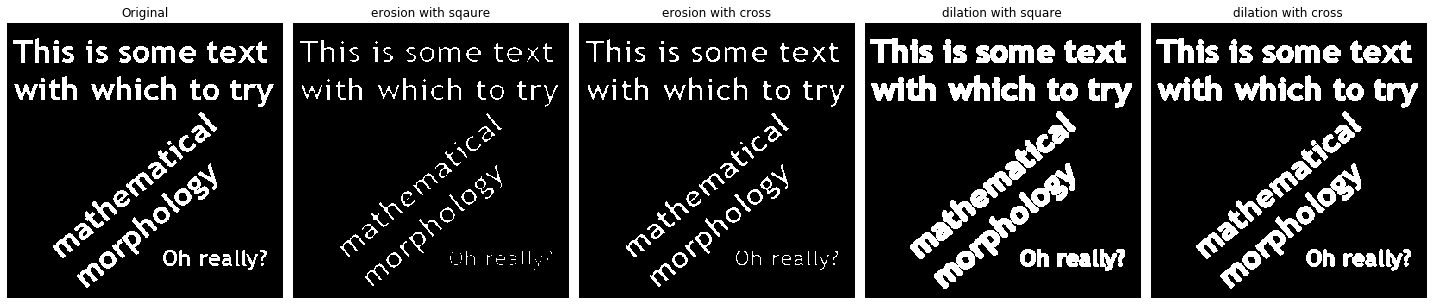

In [38]:
matplot([t, binary_erosion(t, sq), binary_erosion(t, cr), binary_dilation(t, sq), binary_dilation(t, cr)], 
        ["Original", "erosion with sqaure", "erosion with cross", "dilation with square", "dilation with cross"])

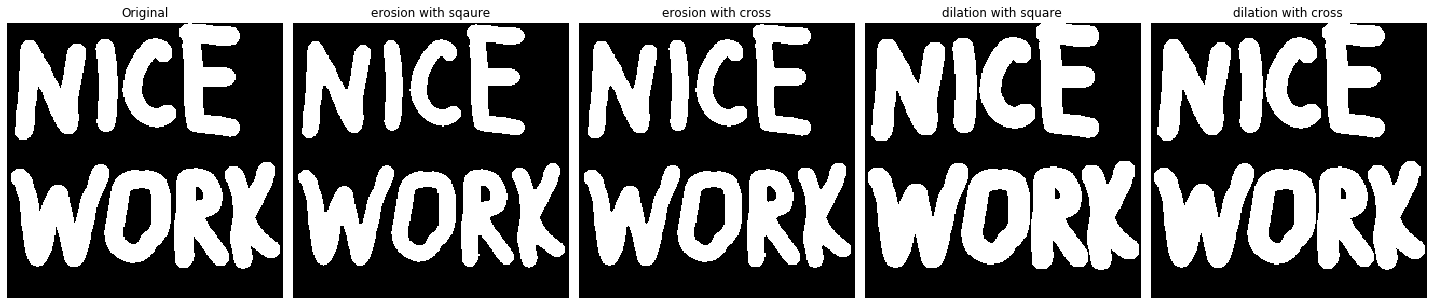

In [39]:
matplot([n, binary_erosion(n, sq), binary_erosion(n, cr), binary_dilation(n, sq), binary_dilation(n, cr)], 
        ["Original", "erosion with sqaure", "erosion with cross", "dilation with square", "dilation with cross"])

Can you see any differences?

1. erosion使得白色的部份向內縮一圈，文字之間的間隔稍微被拉開。  
2. dilation使得白色的部份向外膨脹一圈，文字之間變得比較靠近。
3. 而square比cross多了斜對角方向上的erosion與dilation, 使得影像看起來比較圓滑一些, 不那麼方方正正的

5\. Read in the image `circles2.png`


(a) Erode with squares of increasing size until the image starts to split into disconnected components.

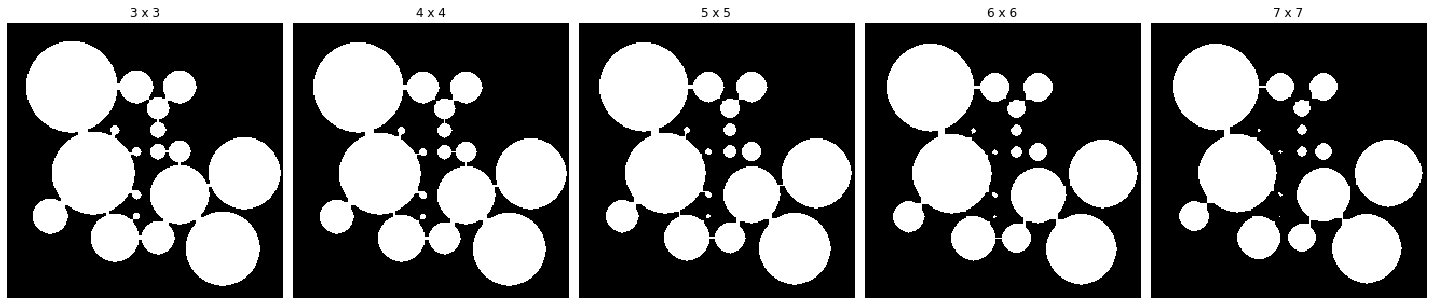

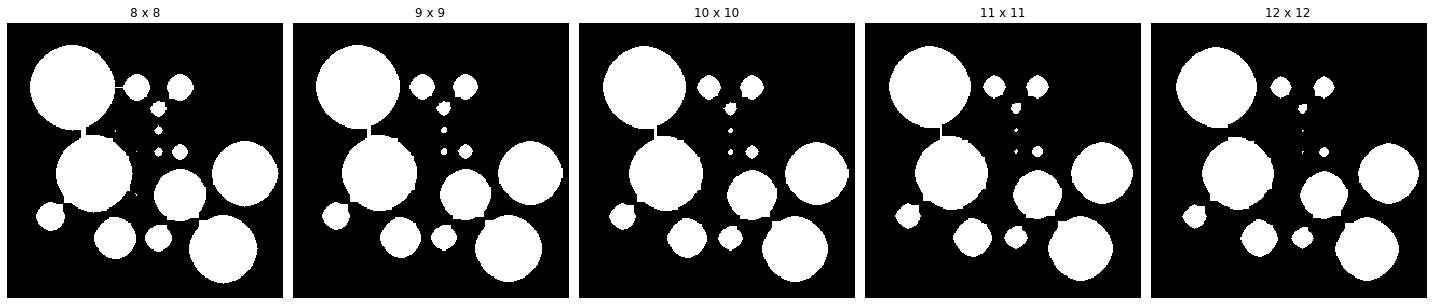

In [40]:
ce1 = binary_erosion(c2, ones((3, 3)))
ce2 = binary_erosion(c2, ones((4, 4)))
ce3 = binary_erosion(c2, ones((5, 5)))
ce4 = binary_erosion(c2, ones((6, 6)))
ce5 = binary_erosion(c2, ones((7, 7)))
ce6 = binary_erosion(c2, ones((8, 8)))
ce7 = binary_erosion(c2, ones((9, 9)))
ce8 = binary_erosion(c2, ones((10, 10)))
ce9 = binary_erosion(c2, ones((11, 11)))
ce10 = binary_erosion(c2, ones((12, 12)))
matplot([ce1, ce2, ce3, ce4, ce5], ["3 x 3", "4 x 4", "5 x 5", "6 x 6", "7 x 7"])
matplot([ce6, ce7, ce8, ce9, ce10], ["8 x 8", "9 x 9", "10 x 10", "11 x 11", "12 x 12"])

(b) Find the coordinates of a pixel in one of the components.

(50, 50), 如圖中白色圓內黑點所示

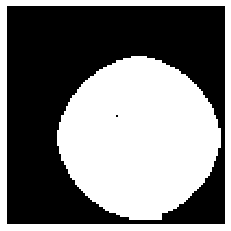

In [41]:
part = (ce10 * 1)[0:100, 0:100]
part[50, 50] = 0
matplot([part], cmap=["gray"])

(c) Use the appropriate commands to isolate that particular component.

取最左上角的component.

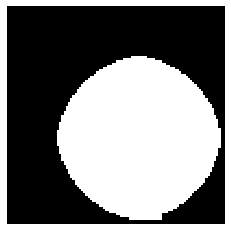

In [42]:
part[50, 50] = 1
matplot([part], cmap=["gray"])

6\.  
(a) With your disconnected image from the previous question, compute its boundary.

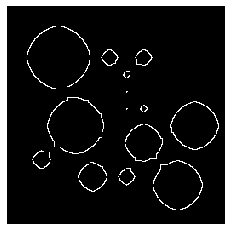

In [43]:
cei = internal_boundary(ce10 * 1, sq)
matplot([cei], cmap=["gray"])

(b) Again find a pixel inside one of the boundaries.

(50, 50), 如圖中白圈內白點所示

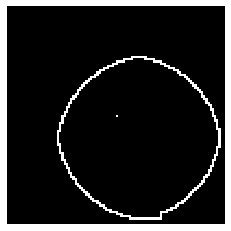

In [44]:
part = cei[0:100, 0:100]
part[50, 50] = 1
matplot([part], cmap=["gray"])

(c) Use the region filling function to fill that region.

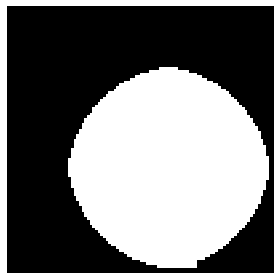

In [45]:
part = binary_fill_holes(part, sq)
matplot([part])

(d) Display the image as a boundary with one of the regions filled in.

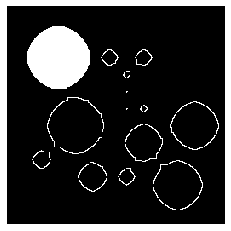

In [46]:
cei[0:100, 0:100] = part
matplot([cei], cmap=["gray"])

7\. Using the 3 x 3 square structuring element, compute the skeletons of

(a) A 7 square

In [47]:
a = ones((7, 7), dtype=int64)
a
bwskel(a)

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

(b) A 5 x 9 rectangle

In [48]:
b = ones((5, 9), dtype=int64)
b
bwskel(b)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

(c) An L shaped figure formed from an 8 x 8 square with a 3 x 3 square taken from a corner.

In [49]:
c = ones((8, 8), dtype=int64)
c[0:3, 5:8] = 0
c
bwskel(c)

array([[1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

(d) An H shaped figure formed from a 15 x 15 square with 5 x 5 squares taken from the centers of the top and bottom.

In [50]:
d = ones((15, 15), dtype=int64)
d[0:5, 5:10] = 0
d[10:15, 5:10] = 0
d
bwskel(d)

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

(e) A cross formed from an 11 x 11 square with 3 x 3 squares taken from each corner.

In [51]:
e = ones((11, 11), dtype=int64)
e[0:3, 0:3] = 0
e[0:3, 8:11] = 0
e[8:11, 0:3] = 0
e[8:11, 8:11] = 0
e
bwskel(e)

array([[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

8\. Repeat the above question but use the cross-shaped structuring element.

(a) A 7 square

In [52]:
a
bwskel(a, cr)

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

array([[1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1]])

(b) A 5 x 9 rectangle

In [53]:
b
bwskel(b, cr)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]])

array([[1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1]])

(c) An L shaped figure formed from an 8 x 8 square with a 3 x 3 square taken from a corner.

In [54]:
c
bwskel(c, cr)

array([[1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

array([[1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1]])

(d) An H shaped figure formed from a 15 x 15 square with 5 x 5 squares taken from the centers of the top and bottom.

In [55]:
d
bwskel(d, cr)

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

(e) A cross formed from an 11 x 11 square with 3 x 3 squares taken from each corner.

In [56]:
e
bwskel(e, cr)

array([[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]])

array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]])

10\. Use the hit-or-miss transform with appropriate structuring elements to find the dot on the `i` in the word `This` in the image `morph_text.png`.

(23, 57)

[23 23 67 67] [ 57  96  41 152]


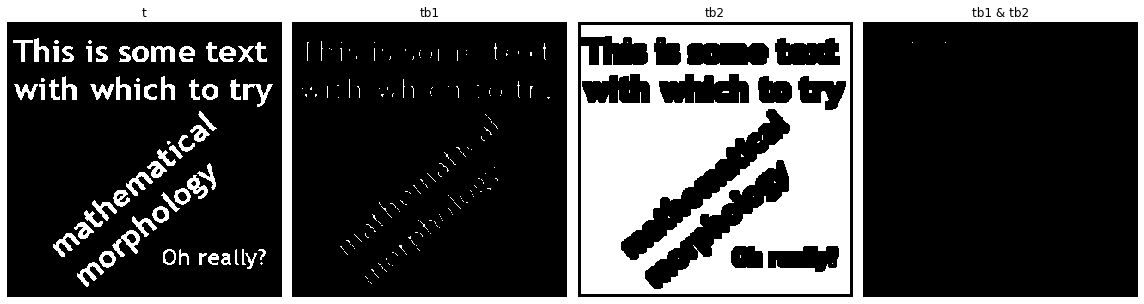

In [57]:
b1 = array([[0, 1, 1, 1, 0], 
            [1, 1, 1, 1, 1], 
            [1, 1, 1, 1, 1], 
            [1, 1, 1, 1, 1], 
            [0, 1, 1, 1, 0]])
x, y, tb1, tb2, tb3 = hit_or_miss(t, b1)
print(x, y)
matplot([t, tb1, tb2, tb3], ["t", "tb1", "tb2", "tb1 & tb2"], cmap=["", "", "", "gray"])